In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [106]:
data=pd.read_csv("Data file.csv")

In [107]:
df=pd.DataFrame(data)

In [108]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [109]:
df.shape

(209593, 37)

The dataset has 209593 rows and 37 columns

In [110]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

The datatype of each column can be seen above

In [111]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

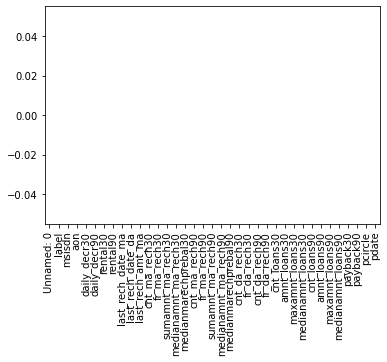

In [112]:
df.isna().sum().plot(kind="bar")

There are no null values in the dataset

# Dropping the columns Unnamed and pdate

In [113]:
df=df.drop(df.columns[0], axis=1)
df=df.drop(df.columns[34], axis=1)

In [114]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


We can see the statistical data of the dataset above.There are outliers in most of the columns

In [115]:
col_names=df.columns
col_names

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate'],
      dtype='object')

We can see the column names.

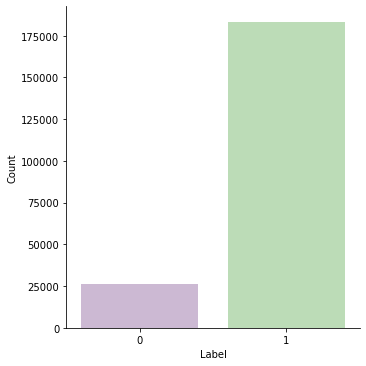

In [116]:
g=sns.catplot(x="label",data=df,kind="count",palette="PRGn",alpha=1)
g.set(xlabel="Label",ylabel="Count")
plt.show()

Label is the target variable and is imbalanced

# Visualizing the distribution of each variable

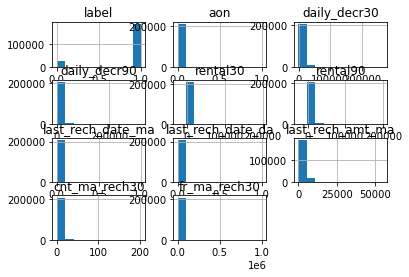

In [117]:
hist = df.iloc[:,0:12].hist()

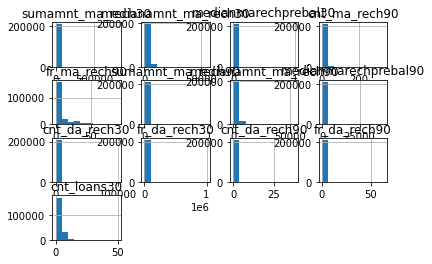

In [118]:
hist = df.iloc[:,12:25].hist()

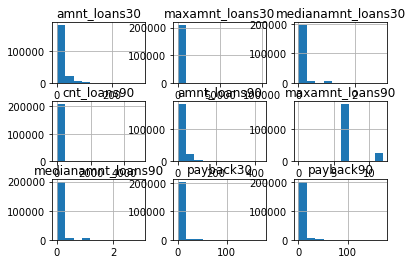

In [119]:
hist = df.iloc[:,25:35].hist()

# Checking outliers

label                      AxesSubplot(0.125,0.772143;0.110714x0.107857)
aon                     AxesSubplot(0.257857,0.772143;0.110714x0.107857)
daily_decr30            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
daily_decr90            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
rental30                AxesSubplot(0.656429,0.772143;0.110714x0.107857)
rental90                AxesSubplot(0.789286,0.772143;0.110714x0.107857)
last_rech_date_ma          AxesSubplot(0.125,0.642714;0.110714x0.107857)
last_rech_date_da       AxesSubplot(0.257857,0.642714;0.110714x0.107857)
last_rech_amt_ma        AxesSubplot(0.390714,0.642714;0.110714x0.107857)
cnt_ma_rech30           AxesSubplot(0.523571,0.642714;0.110714x0.107857)
fr_ma_rech30            AxesSubplot(0.656429,0.642714;0.110714x0.107857)
sumamnt_ma_rech30       AxesSubplot(0.789286,0.642714;0.110714x0.107857)
medianamnt_ma_rech30       AxesSubplot(0.125,0.513286;0.110714x0.107857)
medianmarechprebal30    AxesSubplot(0.257857,0.5132

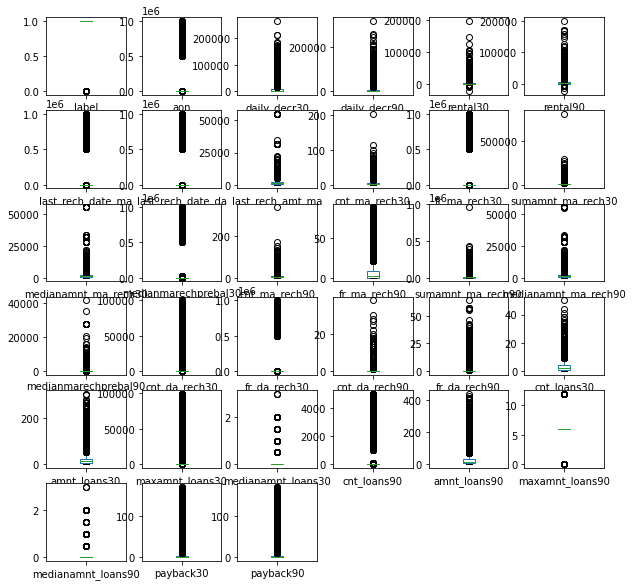

In [120]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

Most of the columns have outliers

# Checking skewness

In [121]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

We can see that most of the columns have skewness

# Encoding the object column

In [122]:
le=LabelEncoder()
df['msisdn']=le.fit_transform(df['msisdn'])
df['pdate']=le.fit_transform(df['pdate'])


In [123]:
df.dtypes

label                     int64
msisdn                    int32
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

The object column has been encoded

# Removing outliers

In [124]:
z=np.abs(zscore(df))
np.where(z>3)
df_new=df[(z<3).all(axis=1)]

In [125]:
df.shape

(209593, 35)

In [126]:
df_new.shape

(161465, 35)

The new dataset has 161465 rows after removing outliers

# Checking correlation

In [127]:
df_new.corr()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
label,1.000000,0.001915,0.086376,0.191662,0.192073,0.048945,0.069545,-0.095769,0.026123,0.159589,...,0.244307,0.002689,0.040130,0.244240,0.246878,0.088565,0.029620,0.142282,0.141053,0.146505
msisdn,0.001915,1.000000,-0.002056,-0.000453,-0.000415,-0.001383,-0.000518,-0.001859,-0.001259,-0.005122,...,0.001660,0.004733,0.001030,0.000476,0.000661,0.000003,0.000134,0.006478,0.004857,-0.001604
aon,0.086376,-0.002056,1.000000,0.071687,0.073848,0.052519,0.057465,0.015165,-0.000733,0.081721,...,0.052399,0.002055,0.000348,0.082985,0.083288,0.029714,-0.004733,0.021474,0.041227,0.070246
daily_decr30,0.191662,-0.000453,0.071687,1.000000,0.979246,0.445846,0.495649,-0.046021,0.058444,0.257911,...,0.420826,0.003933,0.010631,0.514988,0.570296,0.434206,-0.027961,0.148301,0.194491,0.631709
daily_decr90,0.192073,-0.000415,0.073848,0.979246,1.000000,0.433199,0.504950,-0.040094,0.060433,0.247432,...,0.396451,0.003916,0.013181,0.517802,0.573994,0.436362,-0.028166,0.139665,0.190416,0.649485
rental30,0.048945,-0.001383,0.052519,0.445846,0.433199,1.000000,0.950336,-0.017986,0.011158,0.089045,...,0.230621,0.004687,-0.002064,0.282042,0.310023,0.242881,-0.025504,0.147701,0.180398,0.394132
rental90,0.069545,-0.000518,0.057465,0.495649,0.504950,0.950336,1.000000,-0.005881,0.019024,0.090056,...,0.229866,0.003907,0.000736,0.316953,0.349835,0.277055,-0.028455,0.150066,0.201048,0.470884
last_rech_date_ma,-0.095769,-0.001859,0.015165,-0.046021,-0.040094,-0.017986,-0.005881,1.000000,0.025265,0.230253,...,-0.194832,-0.002617,-0.004465,-0.159731,-0.156904,-0.013813,-0.000904,-0.142428,-0.091799,0.069635
last_rech_date_da,0.026123,-0.001259,-0.000733,0.058444,0.060433,0.011158,0.019024,0.025265,1.000000,0.020146,...,0.007187,-0.001800,0.002904,0.012100,0.016532,0.034832,-0.000534,0.003122,0.029857,0.080593
last_rech_amt_ma,0.159589,-0.005122,0.081721,0.257911,0.247432,0.089045,0.090056,0.230253,0.020146,1.000000,...,0.036532,0.003791,0.036543,0.021263,0.043217,0.154227,0.032219,-0.014801,0.011451,0.105531


<AxesSubplot:>

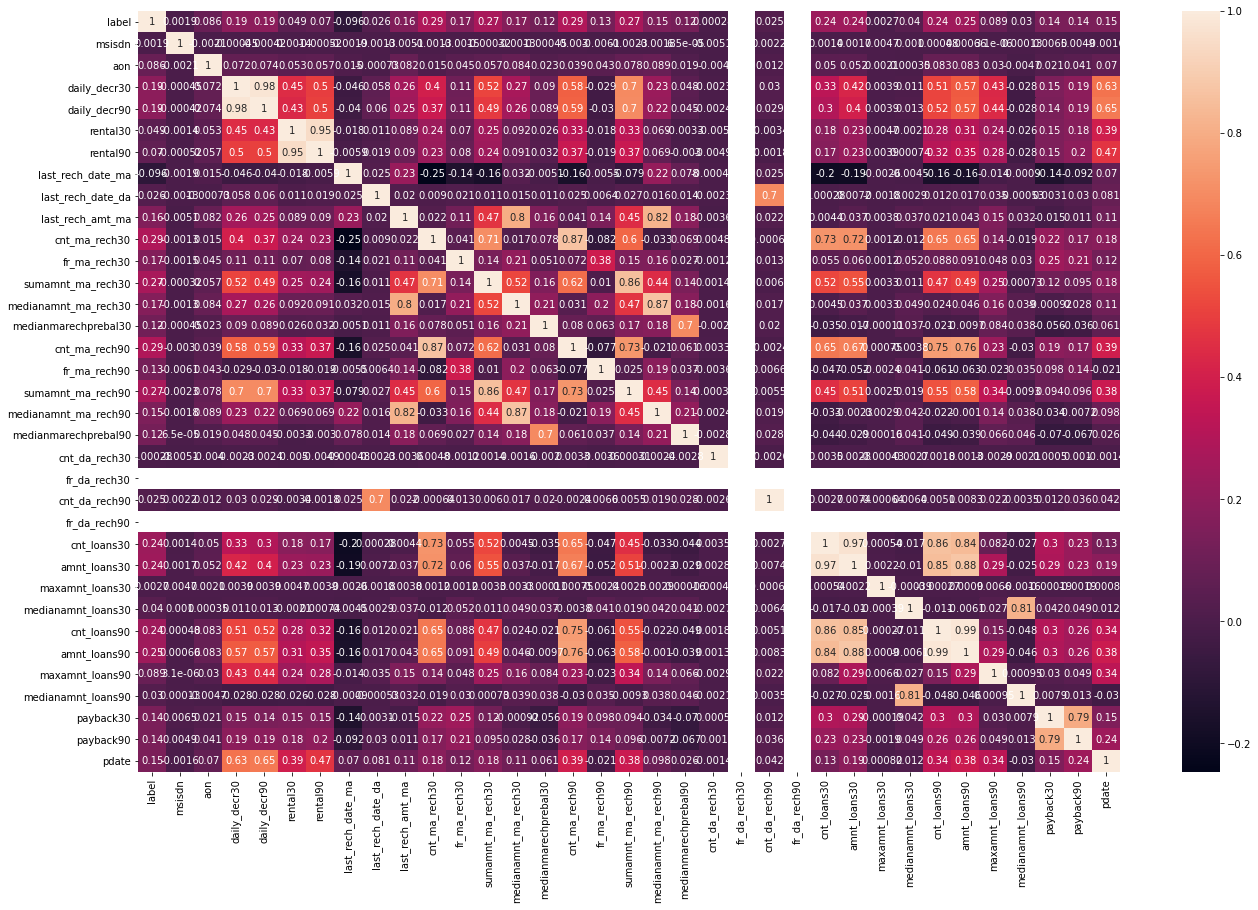

In [128]:
plt.figure(figsize=(22,14))

sns.heatmap(df_new.corr(),annot=True)

# Dropping the columns fr_da_rech30,fr_da_rech90

In [129]:
df_new.drop(['fr_da_rech30'],axis=1,inplace=True)
df_new.drop(['fr_da_rech90'],axis=1,inplace=True)

C:\Users\GR20258288\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

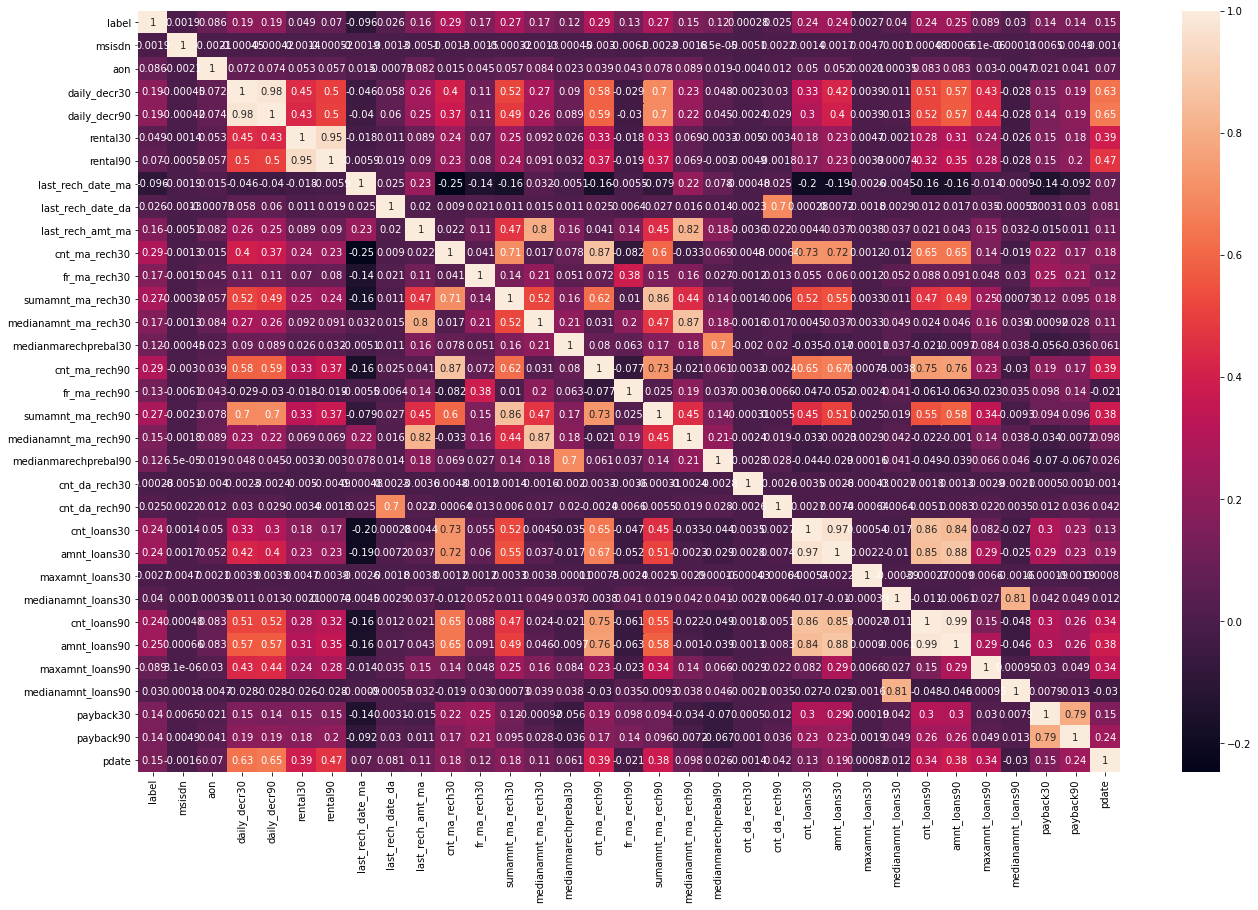

In [130]:
plt.figure(figsize=(22,14))

sns.heatmap(df_new.corr(),annot=True)

Lighter shades are highly correlated

# Splitting the input and target variable

In [131]:
x=df_new.drop(['label'],axis=1)
y=df_new['label']



# Removing skewness using power_transform method

In [132]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\GR20258288\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# Scaling the input variable

In [133]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Using SMOTE technique to balance the Target variable

In [134]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [135]:

trainy.value_counts()

0    139065
1    139065
Name: label, dtype: int64

The target variable is balanced

# Build models

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainx,trainy, test_size = 0.3, random_state = 0) 

# LogisticRegression

In [137]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# logistic regression object 
lr = LogisticRegression(solver='lbfgs', max_iter=400) 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     41668
           1       0.79      0.76      0.77     41771

    accuracy                           0.78     83439
   macro avg       0.78      0.78      0.78     83439
weighted avg       0.78      0.78      0.78     83439



In [138]:
acc=accuracy_score(y_test,predictions)

In [139]:
acc

0.7778496865973945

In [140]:
confusion_matrix(y_test,predictions)

array([[32980,  8688],
       [ 9848, 31923]], dtype=int64)

The accuracy score is 78%

# Plotting the AUC-ROC Curve

In [141]:
fpr,tpr,thresholds=roc_curve(y_test,predictions)

In [142]:
fpr

array([0.        , 0.20850533, 1.        ])

In [143]:
tpr

array([0.        , 0.76423835, 1.        ])

In [144]:
thresholds

array([2, 1, 0], dtype=int64)

Text(0.5, 1.0, 'LogisticRegression')

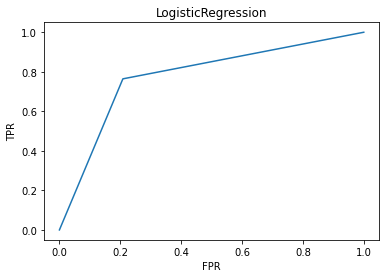

In [145]:
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LogisticRegression')

In [146]:
auc_score=roc_auc_score(y_test,lr.predict(X_test))

In [147]:
auc_score

0.7778665096745775

# DecisionTreeClassifier

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dtc=DecisionTreeClassifier()

In [150]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [151]:
pred=dtc.predict(X_test)

In [152]:
accuracy_score(y_test,pred)

0.9072256378911541

In [153]:
confusion_matrix(y_test,pred)

array([[37959,  3709],
       [ 4032, 37739]], dtype=int64)

In [154]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.91      0.91     41668\n           1       0.91      0.90      0.91     41771\n\n    accuracy                           0.91     83439\n   macro avg       0.91      0.91      0.91     83439\nweighted avg       0.91      0.91      0.91     83439\n'

The accuracy score is 91%

In [155]:
fpr,tpr,thresholds=roc_curve(y_test,pred)


In [156]:
fpr

array([0.        , 0.08901315, 1.        ])

In [157]:
tpr

array([0.       , 0.9034737, 1.       ])

In [158]:
thresholds

array([2, 1, 0], dtype=int64)

Text(0.5, 1.0, 'DecisionTreeClassifier')

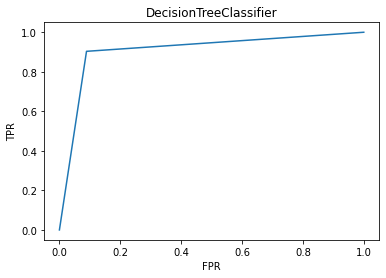

In [159]:
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DecisionTreeClassifier')

In [160]:
auc_score=roc_auc_score(y_test,dtc.predict(X_test))

In [161]:
auc_score

0.9072302751357083

# RandomForestClassifier

In [162]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred2=rfc.predict(X_test)

In [163]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

[[39746  1922]
 [ 2442 39329]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     41668
           1       0.95      0.94      0.95     41771

    accuracy                           0.95     83439
   macro avg       0.95      0.95      0.95     83439
weighted avg       0.95      0.95      0.95     83439



In [164]:
fpr,tpr,thresholds=roc_curve(y_test,pred2)


In [165]:
fpr

array([0.        , 0.04612652, 1.        ])

In [166]:
tpr

array([0.        , 0.94153839, 1.        ])

In [167]:
thresholds

array([2, 1, 0], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

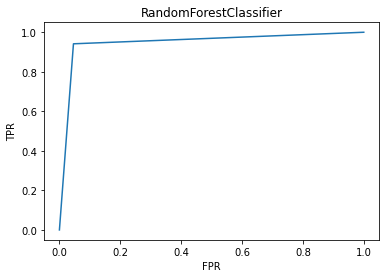

In [168]:
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForestClassifier')
plt.show

In [169]:
auc_score=roc_auc_score(y_test,rfc.predict(X_test))

In [170]:
auc_score

0.9477059319627615

In [171]:
from sklearn.svm import SVC

In [172]:
svc=SVC(kernel='poly')

In [173]:
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [174]:
Pred=svc.predict(X_test)

In [175]:
acc=accuracy_score(y_test,Pred)

In [176]:
acc

0.8272630304773547

In [177]:
confusion_matrix(y_test,Pred)

array([[34453,  7215],
       [ 7198, 34573]], dtype=int64)

In [178]:
classification_report(y_test,Pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.83      0.83     41668\n           1       0.83      0.83      0.83     41771\n\n    accuracy                           0.83     83439\n   macro avg       0.83      0.83      0.83     83439\nweighted avg       0.83      0.83      0.83     83439\n'

In [180]:
fpr,tpr,thresholds=roc_curve(y_test,Pred)

Text(0.5, 1.0, 'SVC')

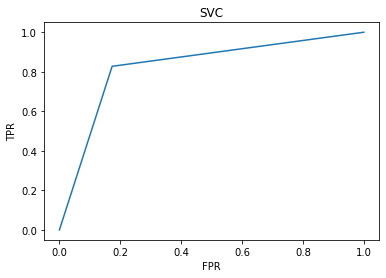

In [181]:
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('SVC')

In [182]:
auc_score=roc_auc_score(y_test,svc.predict(X_test))

In [183]:
auc_score

0.8272625157491692

In [184]:
from sklearn.model_selection import cross_val_score

In [185]:
print(cross_val_score(dtc,X_train,y_train,cv=5).mean())

0.9031644956723323


In [186]:
print(cross_val_score(lr,X_train,y_train,cv=5).mean())

0.7803699164564217


In [187]:
print(cross_val_score(rfc,X_train,y_train,cv=5).mean())

0.945544472706362


In [188]:
print(cross_val_score(svc,X_train,y_train,cv=5).mean())

0.8259344316796493


# Comparing the CV Scores and the accuracy scores of each model Random forest classifier is the best model